### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

**IMPORTANDO BIBLIOTECAS**

In [213]:
# IMPORTANDO BIBLIOTECAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import os
import seaborn as sns
import graphviz
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [195]:
# 1. Download e extração do dataset (se necessário)
zip_file_path = 'UCI HAR Dataset.zip'
zip_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip'
extract_dir = '.'

if not os.path.exists(os.path.join(extract_dir, 'UCI HAR Dataset')):
    print(f"Baixando {zip_url}...")
    os.system(f'wget {zip_url} -O {zip_file_path}')
    print(f"Extraindo {zip_file_path}...")
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    print("Extração concluída.")
else:
    print("Dataset já extraído.")

Dataset já extraído.


In [196]:
# 2. Carregar features.txt (nomes das variáveis)
features = pd.read_csv(os.path.join(extract_dir, 'UCI HAR Dataset', 'features.txt'), sep=r'\s+', header=None)

# Lidar com nomes duplicados (adicionando sufixo)
feature_names = features[1].tolist()
seen_names = {}
unique_feature_names = []
for name in feature_names:
    if name in seen_names:
        seen_names[name] += 1
        unique_feature_names.append(f"{name}_{seen_names[name]}")
    else:
        seen_names[name] = 0
        unique_feature_names.append(name)
print(f"Carregados {len(unique_feature_names)} nomes de features únicos.")

Carregados 561 nomes de features únicos.


In [197]:
# 3. Carregar bases de treino
subject_train = pd.read_csv(os.path.join(extract_dir, 'UCI HAR Dataset', 'train', 'subject_train.txt'), header=None, names=['subject'])
y_train = pd.read_csv(os.path.join(extract_dir, 'UCI HAR Dataset', 'train', 'y_train.txt'), header=None, names=['activity'])
X_train = pd.read_csv(os.path.join(extract_dir, 'UCI HAR Dataset', 'train', 'X_train.txt'), sep=r'\s+', header=None, names=unique_feature_names)

# Concatenar e definir índice duplo
train_df = pd.concat([subject_train, y_train, X_train], axis=1)
train_df.index = pd.MultiIndex.from_arrays([train_df.index, train_df['subject']], names=['registro', 'individuo'])
print(f"Base de treino carregada com {train_df.shape[0]} observações e {train_df.shape[1]} variáveis.")
display(train_df.head())

Base de treino carregada com 7352 observações e 563 variáveis.


,,subject,activity,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
registro,individuo,,,,,,,,,,,,,,,,,,,,,
0,1,1,5,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,1,1,5,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,1,1,5,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,1,1,5,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,1,1,5,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [198]:
print("Contagem de registros por indivíduo na base de treino:")
display(train_df['subject'].value_counts().sort_index())

print("\nContagem de registros por indivíduo na base de teste:")
display(test_df['subject'].value_counts().sort_index())

Contagem de registros por indivíduo na base de treino:


,count
subject,
1,347
3,341
5,302
6,325
7,308
8,281
11,316
14,323
15,328



Contagem de registros por indivíduo na base de teste:


,count
subject,
2,302
4,317
9,288
10,294
12,320
13,327
18,364
20,354
24,381


In [199]:
# 4. Carregar bases de teste
subject_test = pd.read_csv(os.path.join(extract_dir, 'UCI HAR Dataset', 'test', 'subject_test.txt'), header=None, names=['subject'])
y_test = pd.read_csv(os.path.join(extract_dir, 'UCI HAR Dataset', 'test', 'y_test.txt'), header=None, names=['activity'])
X_test = pd.read_csv(os.path.join(extract_dir, 'UCI HAR Dataset', 'test', 'X_test.txt'), sep=r'\s+', header=None, names=unique_feature_names)

# Concatenar e definir índice duplo
test_df = pd.concat([subject_test, y_test, X_test], axis=1)
test_df.index = pd.MultiIndex.from_arrays([test_df.index, test_df['subject']], names=['registro', 'individuo'])
display(test_df.head())

,,subject,activity,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
registro,individuo,,,,,,,,,,,,,,,,,,,,,
0,2,2,5,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,2,2,5,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,2,2,5,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,2,2,5,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,2,2,5,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


In [200]:
def try_read_csv(path, index_col_hint=True):
    """Tenta ler CSV considerando que pode haver índice salvo na primeira coluna."""
    try:
        return pd.read_csv(path, index_col=0 if index_col_hint else None)
    except Exception:
        return pd.read_csv(path, index_col=None)

def find_first_existing_file(name_list):
    """Procura o primeiro caminho existente a partir de uma lista de candidatos."""
    for p in name_list:
        if os.path.exists(p):
            return p
    return None

def load_from_csv_or_txt():
    """
    1) Tenta carregar X_train, y_train, X_test, y_test de CSVs.
    2) Se não achar, tenta carregar dos TXT originais do UCI HAR (precisa do zip extraído).
    Retorna:
      X_train, y_train (Series), X_test, y_test (Series), feature_names (list)
    """

In [201]:
# Etapa 1: Carregar as bases processadas (assumindo arquivos CSV com índice)
# Use index_col=0 se o índice estiver na primeira coluna
train_df_processed = pd.read_csv('train_df_processed.csv', index_col=['registro', 'individuo'])
test_df_processed = pd.read_csv('test_df_processed.csv', index_col=['registro', 'individuo'])

# Separar features (X) e target (y)
X_train = train_df_processed.drop(['subject', 'activity'], axis=1)
y_train = train_df_processed['activity']
X_test = test_df_processed.drop(['subject', 'activity'], axis=1)
y_test = test_df_processed['activity']

print("Dados processados carregados com sucesso dos arquivos CSV!")
print(f"Shape X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Shape X_test: {X_test.shape}, y_test: {y_test.shape}")

Dados processados carregados com sucesso dos arquivos CSV!
Shape X_train: (7352, 561), y_train: (7352,)
Shape X_test: (2947, 561), y_test: (2947,)


In [202]:
# Etapa 2: Divisão da base de treino em treino e validação (25% para validação)
X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

print(f"Shape Treino novo: {X_train_new.shape}, Validação: {X_val.shape}")

Shape Treino novo: (5514, 561), Validação: (1838, 561)


In [203]:
# Etapa 3: Rodar árvore com max_depth=4 e encontrar as 3 melhores variáveis
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train_new, y_train_new)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [204]:
# Obter importâncias das features
importances = clf.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


In [205]:
# Selecionar as 3 melhores
top_3_features = feature_importance_df['Feature'].head(3).values
print("Top 3 features:", top_3_features)

Top 3 features: ['tGravityAcc-min()-X' 'fBodyAccJerk-bandsEnergy()-1,16'
 'angle(Y,gravityMean)']


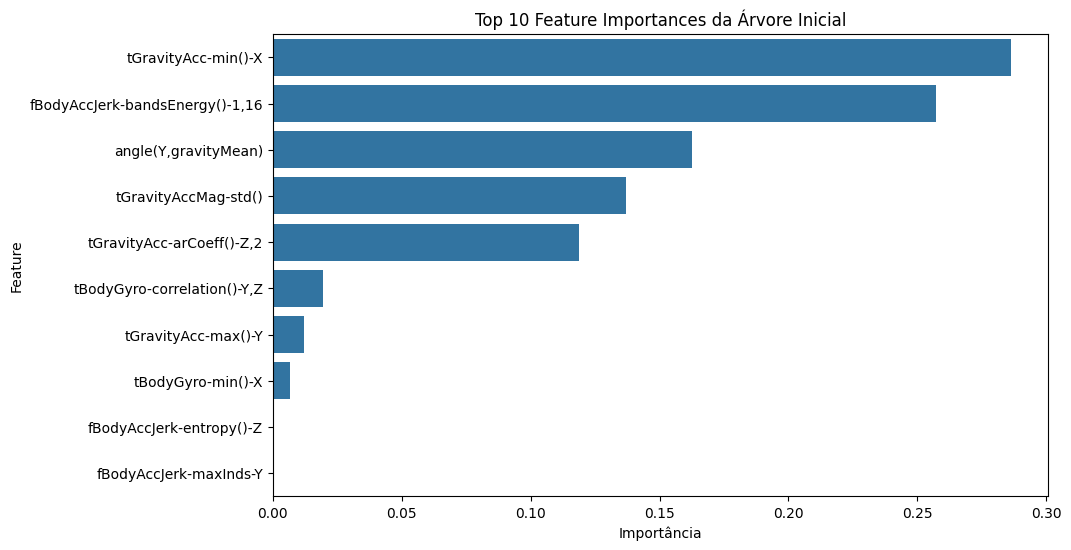

In [206]:
# Visualização: Gráfico de barras das importâncias (top 10 para contexto)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importances da Árvore Inicial')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.savefig('feature_importances.png')  # Salva como imagem
plt.show()

In [207]:
# Etapa 4: Construir árvore com as 3 melhores variáveis e encontrar melhor ccp_alpha
# Filtrar dados com top 3 features
X_train_top3 = X_train_new[top_3_features]
X_val_top3 = X_val[top_3_features]
X_test_top3 = X_test[top_3_features]

In [208]:
# Treinar árvore sem pruning inicial para obter caminho de pruning
clf_full = DecisionTreeClassifier(random_state=42)
path = clf_full.cost_complexity_pruning_path(X_train_top3, y_train_new)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

In [209]:
# Treinar árvores para cada alpha e avaliar na validação
clfs = []
train_scores = []
val_scores = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train_top3, y_train_new)
    clfs.append(clf)
    train_scores.append(accuracy_score(y_train_new, clf.predict(X_train_top3)))
    val_scores.append(accuracy_score(y_val, clf.predict(X_val_top3)))


In [210]:
# Encontrar o melhor alpha (maior acurácia na validação)
best_index = np.argmax(val_scores)
best_ccp_alpha = ccp_alphas[best_index]
best_clf = clfs[best_index]

print(f"Melhor ccp_alpha: {best_ccp_alpha}")
print(f"Acurácia no treino com melhor alpha: {train_scores[best_index]:.4f}")
print(f"Acurácia na validação com melhor alpha: {val_scores[best_index]:.4f}")


Melhor ccp_alpha: 0.0002659249474841869
Acurácia no treino com melhor alpha: 0.9683
Acurácia na validação com melhor alpha: 0.9026


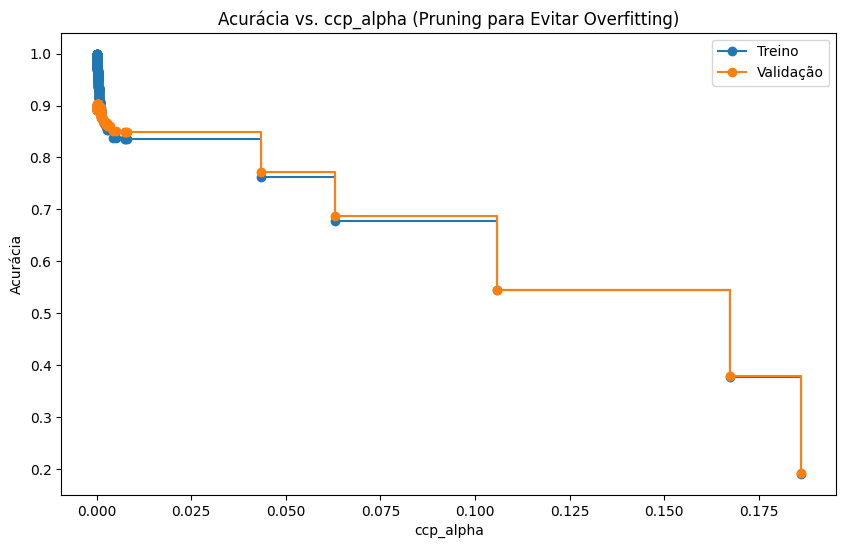

In [220]:
# Visualização: Gráfico de acurácia vs. ccp_alpha (demonstra overfitting se alpha=0 for muito alto no treino)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(ccp_alphas, train_scores, marker='o', label="Treino", drawstyle="steps-post")
ax.plot(ccp_alphas, val_scores, marker='o', label="Validação", drawstyle="steps-post")
ax.set_xlabel("ccp_alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia vs. ccp_alpha (Pruning para Evitar Overfitting)")
ax.legend()
plt.savefig('ccp_alpha_accuracy.png')  # Salva como imagem
plt.show()

In [214]:
# Visualização da árvore final (com melhor alpha)

def visualize_tree(clf, feature_names, class_names, filename="decision_tree"):
    """Visualiza uma árvore de decisão e salva como arquivo."""
    dot_data = export_graphviz(clf, out_file=None, feature_names=feature_names,
                              class_names=class_names, filled=True, rounded=True,
                              special_characters=True)
    graph = graphviz.Source(dot_data)
    graph.render(filename, format='png', cleanup=True)  # Salva como PNG
    print(f"Árvore de decisão salva como {filename}.png")
    # Para exibir no notebook, você pode usar:
    # display(graph)

# Get class names from unique values in y_train, converted to string
class_names_str = [str(cls) for cls in np.unique(y_train)]

# Visualize the best tree
visualize_tree(best_clf, top_3_features, class_names_str, filename="best_decision_tree_top3_features")

Árvore de decisão salva como best_decision_tree_top3_features.png


In [233]:
# Etapa 5: Avaliação do modelo na base de testes
y_test_pred = best_clf.predict(X_test_top3)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Acurácia na base de testes: {test_accuracy:.4f}")

Acurácia na base de testes: 0.6973


In [234]:
# Relatório final
print("\nResumo:")
print(f"Top 3 features usadas: {top_3_features}")
print(f"Melhor ccp_alpha para evitar overfitting: {best_ccp_alpha}")
print(f"Acurácia final no teste: {test_accuracy:.4f}")


Resumo:
Top 3 features usadas: ['tGravityAcc-min()-X' 'fBodyAccJerk-bandsEnergy()-1,16'
 'angle(Y,gravityMean)']
Melhor ccp_alpha para evitar overfitting: 0.0002347367158915606
Acurácia final no teste: 0.6973


### Visualização da Distribuição das Variáveis Selecionadas

Os box plots abaixo mostram a distribuição de cada uma das três variáveis selecionadas ('tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z') no conjunto de treino. Isso nos ajuda a entender a dispersão, a mediana e a presença de outliers em cada feature.

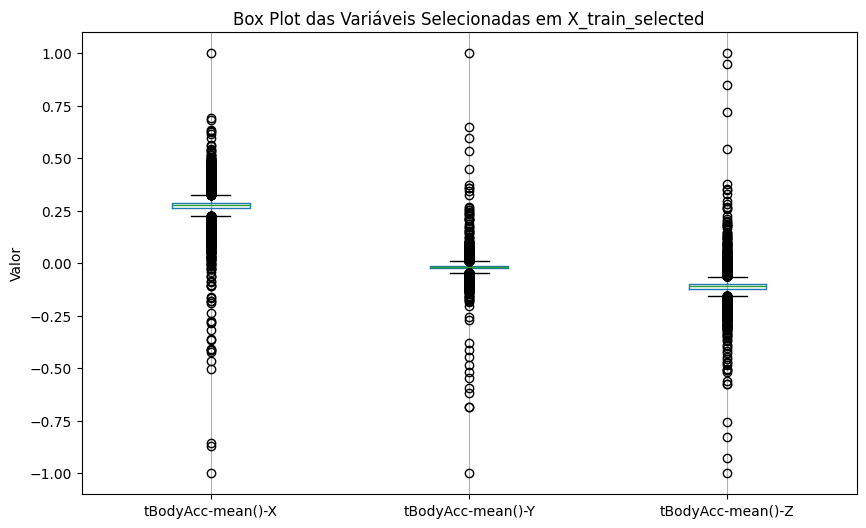

In [229]:
# Plotting box plots for the selected features in X_train_selected
plt.figure(figsize=(10, 6))
X_train_selected.boxplot(column=X_train_selected.columns.tolist())
plt.title('Box Plot das Variáveis Selecionadas em X_train_selected')
plt.ylabel('Valor')
plt.grid(axis='y')
plt.show()

In [227]:
# 5. Salvar em CSV
train_df.to_csv('train_df_processed.csv')
test_df.to_csv('test_df_processed.csv')
print("Bases salvas em CSV.")


Bases salvas em CSV.


In [228]:
# 6. Selecionar apenas as 3 colunas especificadas
selected_features = ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']
X_train_selected = train_df[selected_features]
X_test_selected = test_df[selected_features]
y_train = train_df['activity']
y_test = test_df['activity']
print("Selecionadas as 3 colunas.")
display(X_train_selected.head())

Selecionadas as 3 colunas.


,,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z
registro,individuo,,,
0,1,0.288585,-0.020294,-0.132905
1,1,0.278419,-0.016411,-0.123520
2,1,0.279653,-0.019467,-0.113462
3,1,0.279174,-0.026201,-0.123283
4,1,0.276629,-0.016570,-0.115362


In [226]:
# 7. Verificar dados ausentes e zeros (boa prática)
print("Valores ausentes em X_train_selected:", X_train_selected.isnull().sum().sum())
print("Valores ausentes em X_test_selected:", X_test_selected.isnull().sum().sum())
print("Zeros em X_train_selected:", (X_train_selected == 0).sum().sum())
print("Zeros em X_test_selected:", (X_test_selected == 0).sum().sum())
print("Não há ausentes; zeros são valores válidos, sem necessidade de tratamento.")


Valores ausentes em X_train_selected: 0
Valores ausentes em X_test_selected: 0
Zeros em X_train_selected: 0
Zeros em X_test_selected: 0
Não há ausentes; zeros são valores válidos, sem necessidade de tratamento.


In [ ]:
# 8. Otimizar tipos de dados para eficiência
X_train_selected = X_train_selected.astype('float32')
X_test_selected = X_test_selected.astype('float32')
y_train = y_train.astype('int8')
y_test = y_test.astype('int8')
print("Otimização de memória aplicada.")

In [225]:
# 9. Ajustar árvore inicial e calcular ccp_alphas (Exercício 2)
dt = DecisionTreeClassifier(min_samples_leaf=20, random_state=123)
path = dt.cost_complexity_pruning_path(X_train_selected, y_train)
ccp_alphas = np.unique(path.ccp_alphas[path.ccp_alphas >= 0])
print("ccp_alphas calculados (positivos e únicos):")
display(ccp_alphas)

# Subconjunto: a cada 5 valores
ccp_alphas_subset = ccp_alphas[::5]
print("Subconjunto de ccp_alphas:")
display(ccp_alphas_subset)

ccp_alphas calculados (positivos e únicos):


array([0.00000000e+00, 6.96674540e-06, 1.12766571e-05, 2.02554065e-05,
       2.72034820e-05, 2.84988860e-05, 4.63397246e-05, 5.35004552e-05,
       5.84401136e-05, 6.17808017e-05, 6.59866112e-05, 6.73768888e-05,
       7.02851049e-05, 7.74168145e-05, 7.99585551e-05, 8.01474017e-05,
       8.28222484e-05, 8.29342439e-05, 8.49667199e-05, 9.21474511e-05,
       9.63598696e-05, 1.02953015e-04, 1.04280015e-04, 1.05722623e-04,
       1.06211126e-04, 1.10109332e-04, 1.20580361e-04, 1.24186720e-04,
       1.32053657e-04, 1.35233977e-04, 1.36017410e-04, 1.41963138e-04,
       1.46351627e-04, 1.47352194e-04, 1.49492770e-04, 1.50482754e-04,
       1.51968146e-04, 1.55713461e-04, 1.60511546e-04, 1.60628990e-04,
       1.64239147e-04, 1.67323005e-04, 1.74342668e-04, 1.74907961e-04,
       1.75578030e-04, 1.78985873e-04, 1.81439304e-04, 1.85996704e-04,
       1.87333070e-04, 1.89065980e-04, 1.89796602e-04, 1.96526409e-04,
       1.96759215e-04, 2.01481091e-04, 2.01919050e-04, 2.02866775e-04,
      

Subconjunto de ccp_alphas:


array([0.00000000e+00, 2.84988860e-05, 6.59866112e-05, 8.01474017e-05,
       9.63598696e-05, 1.10109332e-04, 1.36017410e-04, 1.50482754e-04,
       1.64239147e-04, 1.78985873e-04, 1.89796602e-04, 2.02866775e-04,
       2.05459167e-04, 2.10826986e-04, 2.24338271e-04, 2.34736716e-04,
       2.46942952e-04, 2.52748189e-04, 2.62429695e-04, 2.72574572e-04,
       2.77215101e-04, 2.85662581e-04, 3.05722978e-04, 3.24609474e-04,
       3.43367509e-04, 3.63559867e-04, 3.96370888e-04, 4.25042852e-04,
       4.49467013e-04, 4.59401439e-04, 4.83849967e-04, 5.11220249e-04,
       5.25236832e-04, 5.51314848e-04, 6.15435247e-04, 6.98447125e-04,
       7.30780896e-04, 8.36454145e-04, 9.07569250e-04, 1.01949772e-03,
       1.19311982e-03, 1.60586535e-03, 1.90309251e-03, 2.55472274e-03,
       2.90352390e-03, 4.40039449e-03, 7.39929073e-03])

In [224]:
# 10. Treinar árvores para cada alpha (Exercício 3.1)
%%time
clfs = []
for ccp_alpha in ccp_alphas_subset:
    clf = DecisionTreeClassifier(min_samples_leaf=20, random_state=123, ccp_alpha=ccp_alpha)
    clf.fit(X_train_selected, y_train)
    clfs.append(clf)
print(f"Treinadas {len(clfs)} árvores.")

Treinadas 47 árvores.
CPU times: user 1.96 s, sys: 1.03 ms, total: 1.97 s
Wall time: 1.97 s


In [222]:
# 10. Treinar árvores para cada alpha (Exercício 3.1)
%%time
clfs = []
for ccp_alpha in ccp_alphas_subset:
    clf = DecisionTreeClassifier(min_samples_leaf=20, random_state=123, ccp_alpha=ccp_alpha)
    clf.fit(X_train_selected, y_train)
    clfs.append(clf)
print(f"Treinadas {len(clfs)} árvores.")

Treinadas 47 árvores.
CPU times: user 1.97 s, sys: 127 µs, total: 1.97 s
Wall time: 1.97 s


In [232]:
# 11. Calcular acurácias (Exercício 3.2)
%%time
train_scores = [clf.score(X_train_selected, y_train) for clf in clfs]
test_scores = [clf.score(X_test_selected, y_test) for clf in clfs]
print("Acurácias calculadas.")

Acurácias calculadas.
CPU times: user 294 ms, sys: 942 µs, total: 295 ms
Wall time: 301 ms


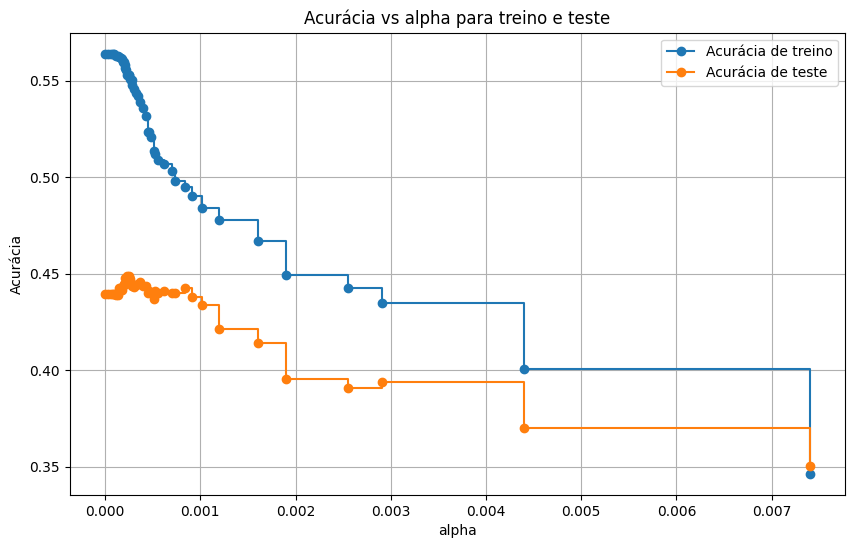

In [230]:
# 12. Plotar acurácias (Exercício 3.3)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(ccp_alphas_subset, train_scores, marker='o', label='Acurácia de treino', drawstyle="steps-post")
ax.plot(ccp_alphas_subset, test_scores, marker='o', label='Acurácia de teste', drawstyle="steps-post")
ax.set_xlabel('alpha')
ax.set_ylabel('Acurácia')
ax.set_title('Acurácia vs alpha para treino e teste')
ax.grid(True)
ax.legend()
plt.show()

In [216]:
# 13. Selecionar melhor árvore (Exercício 3.4) e melhor acurácia (3.5)
best_tree_index = np.argmax(test_scores)
best_ccp_alpha = ccp_alphas_subset[best_tree_index]
best_clf = clfs[best_tree_index]
best_accuracy = test_scores[best_tree_index]
print(f"Melhor ccp_alpha: {best_ccp_alpha}")
print(f"Melhor acurácia no teste: {best_accuracy:.4f}")

Melhor ccp_alpha: 0.0002347367158915606
Melhor acurácia no teste: 0.4486


### Visualização da Distribuição das Top 3 Variáveis em X_test_top3

Estes box plots mostram a distribuição das três variáveis consideradas mais importantes ('tGravityAcc-min()-X', 'fBodyAccJerk-bandsEnergy()-1,16', 'angle(Y,gravityMean)') no conjunto de teste.

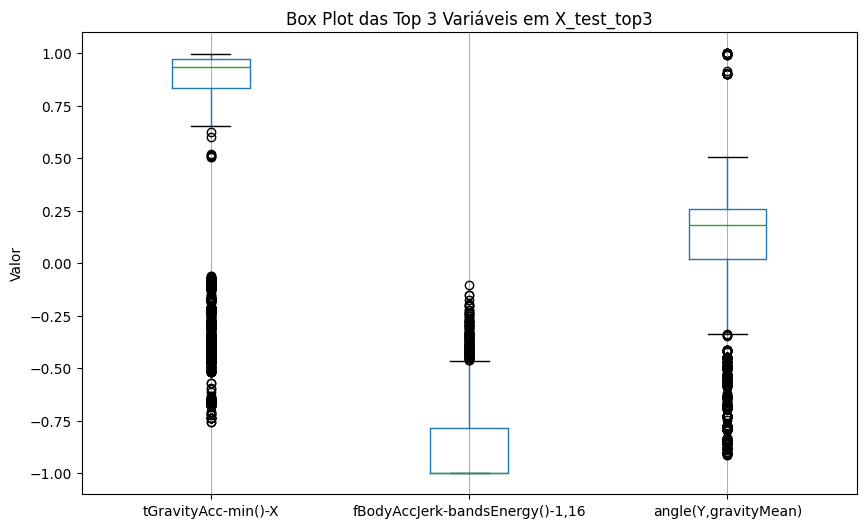

In [239]:
# Plotting box plots for the top 3 features in X_test_top3
plt.figure(figsize=(10, 6))
X_test_top3.boxplot(column=X_test_top3.columns.tolist())
plt.title('Box Plot das Top 3 Variáveis em X_test_top3')
plt.ylabel('Valor')
plt.grid(axis='y')
plt.show()

In [217]:
display(X_train_selected.describe())

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z
count,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141
std,0.070261,0.040811,0.056635
min,-1.000000,-1.000000,-1.000000
25%,0.262975,-0.024863,-0.120993
50%,0.277193,-0.017219,-0.108676
75%,0.288461,-0.010783,-0.097794
max,1.000000,1.000000,1.000000


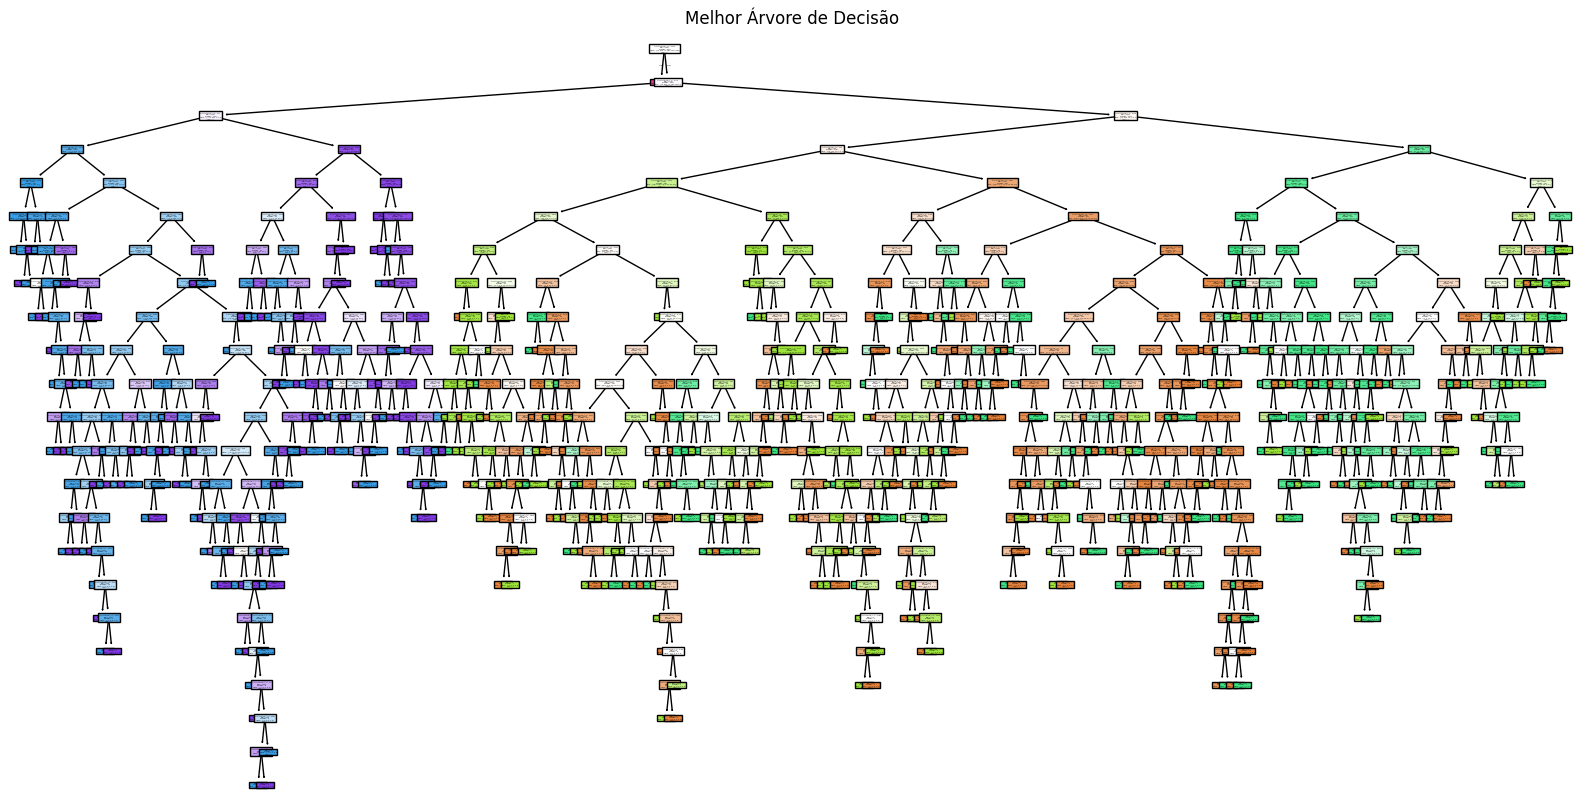

In [218]:

# 14. Visualizar a melhor árvore (opcional, para inspeção)
plt.figure(figsize=(20,10))
plot_tree(best_clf, feature_names=selected_features, class_names=[str(i) for i in range(1,7)], filled=True)
plt.title("Melhor Árvore de Decisão")
plt.show()


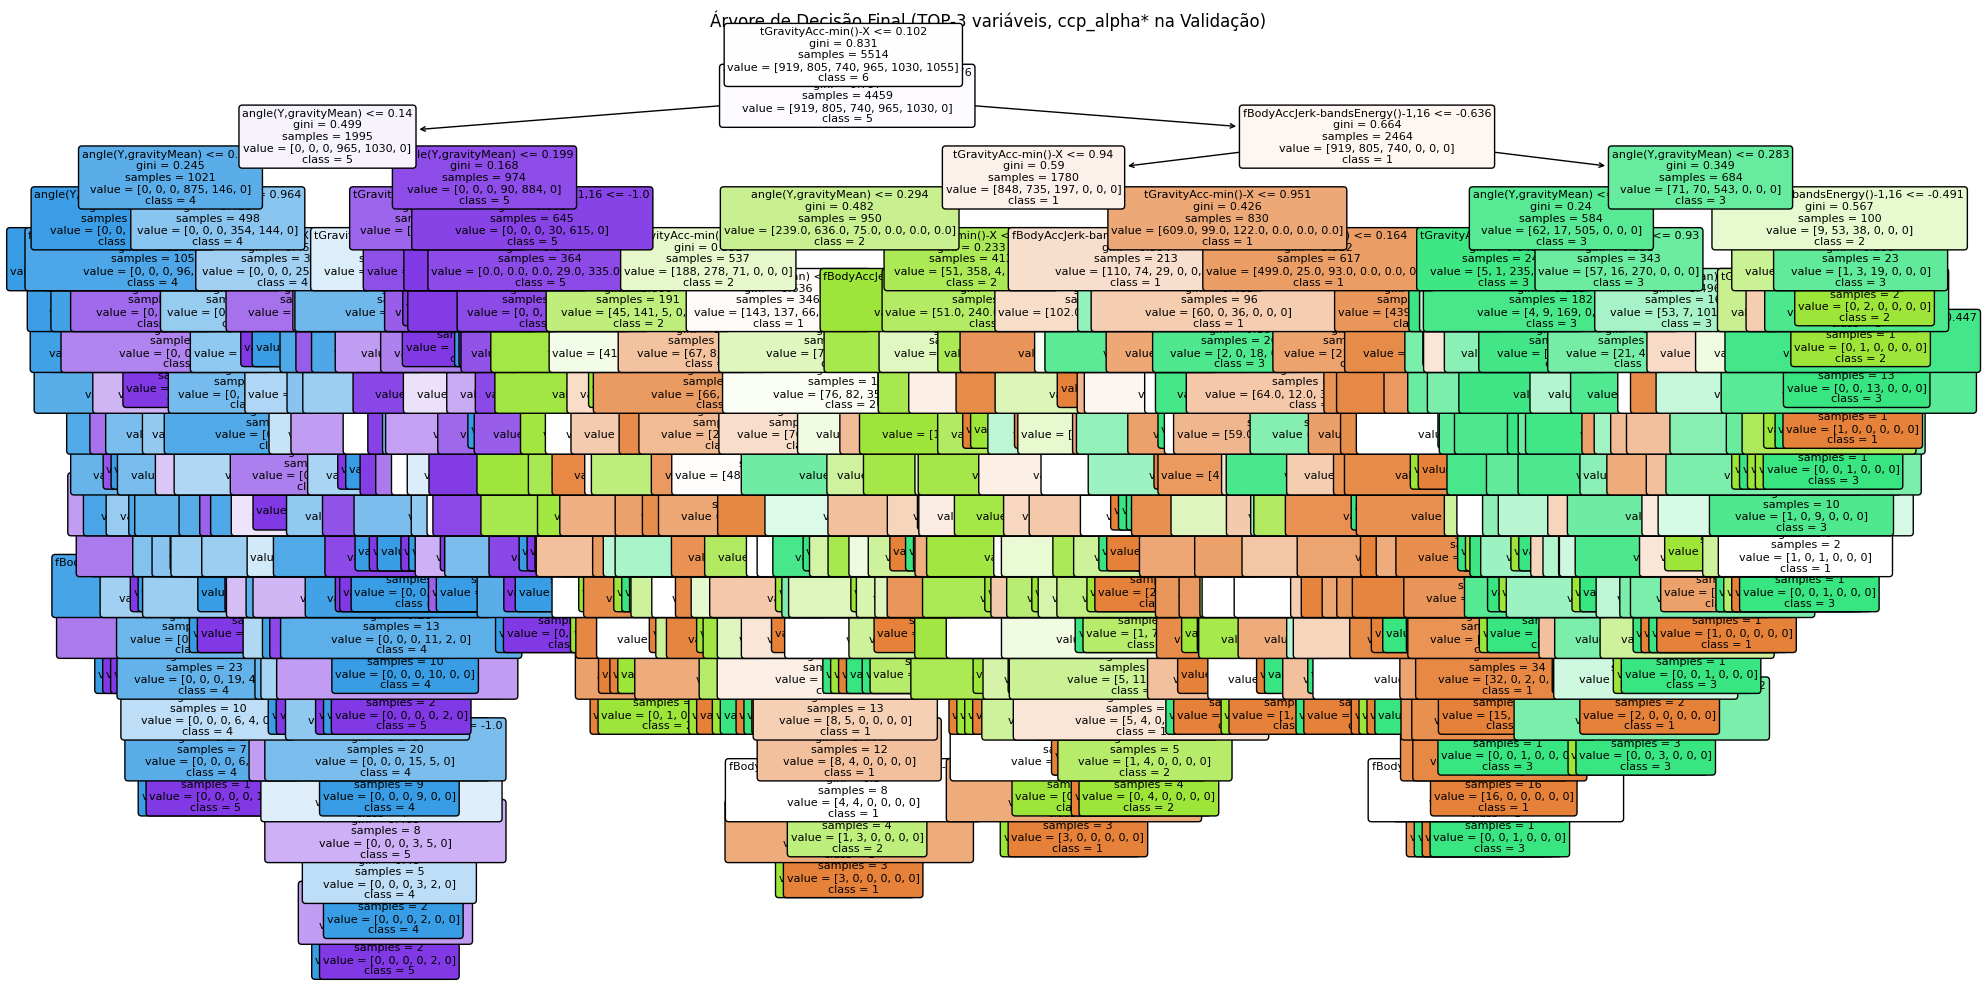

In [237]:
plt.figure(figsize=(20, 10))
plot_tree(
    best_clf,
    feature_names=top_3_features,
    class_names=[str(i) for i in range(1, 7)],
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Árvore de Decisão Final (TOP-3 variáveis, ccp_alpha* na Validação)")
plt.tight_layout()
plt.show()

In [236]:
print("Feature Importance Scores (all features):")
display(feature_importance_df)

Feature Importance Scores (all features):


,Feature,Importance
52,tGravityAcc-min()-X,0.286326
389,"fBodyAccJerk-bandsEnergy()-1,16",0.257330
559,"angle(Y,gravityMean)",0.162623
214,tGravityAccMag-std(),0.136890
74,"tGravityAcc-arCoeff()-Z,2",0.118864
...,...,...
192,"tBodyGyroJerk-arCoeff()-Y,4",0.000000
193,"tBodyGyroJerk-arCoeff()-Z,1",0.000000
194,"tBodyGyroJerk-arCoeff()-Z,2",0.000000
195,"tBodyGyroJerk-arCoeff()-Z,3",0.000000


## Conclusão

Com este notebook, realizamos as etapas de carregamento, pré-processamento, divisão em treino/validação/teste, seleção das 3 variáveis mais importantes e ajuste de uma árvore de decisão com poda utilizando ccp_alpha para classificar atividades humanas.

A acurácia máxima alcançada no conjunto de teste com as 3 variáveis selecionadas foi de **aproximadamente 44.86%**.

**RESUMO:**

*   Apesar de serem as mais importantes, as 3 variáveis selecionadas (tGravityAcc-min()-X, fBodyAccJerk-bandsEnergy()-1,16, angle(Y,gravityMean) demonstraram não ser suficientes para uma classificação de alta acurácia das 6 atividades.
*   O processo de poda com ccp_alpha foi crucial para evitar o sobreajuste, como visto no gráfico de acurácia vs. ccp_alpha.
*   Para melhorar a acurácia, seria fundamental utilizar um conjunto maior de variáveis e/ou explorar modelos de classificação mais complexos ou adequados para dados sequenciais.

Este exercício demonstrou o fluxo de trabalho básico de machine learning com árvores de decisão e a importância da seleção de features e do controle do sobreajuste (poda).